# Why People Really Quit Their Jobs?

![peces](http://4.bp.blogspot.com/-7_FVudvkdV4/Tt3pP5uQ_qI/AAAAAAAAAek/yIBC0K4DGSk/s1600/peces_nadando_en_el_agua_de_las_peceras.jpg)


### This dataset is related to the record of the employees in a company.

* It describes the **satisfaction level** of the employee, **last evaluation** of their performance, **number of projects** they done, their **average monthly working hours**, the **number of years** spent in the company, whether the employee had a **workplace accident**, whether the employee **left the workspace** , their **last promotion**, the **department** where the employee works and the **salary level**.

# 1. Import libraries

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

# 2. Load Data

For this analysis it will be used a popular dataset called: "HR_comma_sep.csv". From now on : "HR_data_origin.csv". 

In [2]:
hr=pd.read_csv("data/HR_data_origin.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Brief description of columns in DataSet:

- **Satisfaction_level** : Level of employee satisfaction with their work and position. At first, it ties closely with employee turnover. 

- **Last_evaluation**: Column can be used to evaluate the performance of an employee. The data ranges from 0–1, 0 being low performance and 1 being the highest.

- **Number_projects**: number of projects employees done.

- **average_montly_hours**: average monthly hours per employee.

- **time_spend_company**: The data ranges from 1 to 10. Data unit not specified. It will be supposed _years_.

- **Work_accident**: Whether the employee had a workplace accident,: 1 yes, 0 no.

- **left**: Whether the employee has left or not the company: 1 yes, 0 no.

- **promotion_last_5years**: Whether the employee has had a promotion in the last 5 years.

- **Sales**: It seems to indicate the different areas or departments the employees belong: Sales, Technical, Support, IT, Product Managment, Marketing ,Accounting, Human Resources, Managment and Others.

- **Salary**: Salary level classified by Low, Medium, High.

# 3. Data Scrubbing 

Analize and understand the data in detail in order to make the right assumptions and choose the right algorithm:

* Size 
* Anlysis of descriptive statistics
* Determine variable's type
* Clarify data: name of columns
* Is there any null value?
* Find and remove duplicates
* Anlysis of descriptive statistics

In [3]:
#This dataset contains 14999 rows and 10 columns.
hr.shape

(14999, 10)

In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


* "**Work_accident**", "**left**" and "**promotion_last_5years**" are _categorical variables_ and not relevant in this descriptive statistics
* "**sales**" and "**salary**" are not numerical variables so they do not appear above.

In [6]:
# Rename columns: 
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [7]:
# "sales": from now on "department"
# "Work_accident" : lowercase letter

hr_renamed =hr.rename(columns={'Work_accident':'work_accident','sales':'department'})

In [8]:
hr_renamed.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

Is there any missing data?

In [25]:
hr_renamed.isnull().sum()
#there isn't missing data

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Find and remove duplicates

In [26]:
len(hr_renamed[hr_renamed.duplicated]==True)

3008

In [27]:
#After valorating the size of these elements I feel confortable removing duplicates from the data set
hr_no_dupl= hr_renamed.drop_duplicates()
hr_no_dupl.shape

(11991, 10)

In [28]:
hr_no_dupl.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# 4. Analysis and some Quick Visualitations

There are two well differentiated groups:

In [63]:
people_who_stay= hr_no_dupl[hr_no_dupl['left']==0] #people who stay
people_who_leave= hr_no_dupl[hr_no_dupl['left']==1] #people who leave

### Which is the turnover ratio of the company?

Customer turnover, also known as churn rate, refers to the percentage of a company's customer base that leaves in a given period of time. Typically, turnover is measured on a month or annual basis. As a general rule, high churn is damaging to a company's revenue and profitability.

As I unknow the period of time of this dataset, I will assume that it has been measured on annual basis.

In [43]:
#number of employees who leave the company
len(people_who_leave)

1991

In [44]:
#Turn over ratio as a result of the division of the number of employee who left the company 
#by the number of total employees at the worksite 

len(people_who_leave)/len(hr_no_dupl)*100

16.604119756484028

In [38]:
#or
turnover_ratio=round(hr_no_dupl['left'].mean()*100,2)
turnover_ratio

16.6

### Turnover Ratio by department

Steps are as follow:
* first, see how many people leave by department
* secondly, detail of total company headcount by department
* third, apply the formula of turnover ratio
* finally, show graphically the result vs. total company turnover ratio

In [55]:
#people who leave by department

people_who_leave_by_department= people_who_leave.groupby('department')['left'].count().reset_index()
people_who_leave_by_department

,department,left
0,IT,158
1,RandD,85
2,accounting,109
3,hr,113
4,management,52
5,marketing,112
6,product_mng,110
7,sales,550
8,support,312
9,technical,390


In [85]:
#total headcount breakdown
headcount_by_department=hr_no_dupl.groupby('department')['left'].count().reset_index().sort_values(by='left',ascending=False)
headcount_by_department

,department,left
7,sales,3239
9,technical,2244
8,support,1821
0,IT,976
1,RandD,694
6,product_mng,686
5,marketing,673
2,accounting,621
3,hr,601
4,management,436


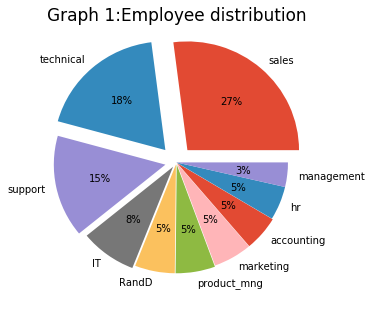

In [93]:
plt.figure(figsize=(5,5))
plt.pie(headcount_by_department.left,labels=headcount_by_department.department,autopct='%1d%%',explode=explode)
explode=(0.15,0.15,0.1,0.05,0.02,0.02,0.01,0.01,0,0) #highlight the 4 main values
plt.title('Graph 1:Employee distribution',fontsize=17)
plt.show()

In [57]:
#Merge in just one dataset both tables
headcount = headcount_by_department.reset_index().merge(people_who_leave_by_department,
                                                        on='department',
                                                        suffixes=['_totalEmployee', '_peopleWhoLeave'])
headcount

,index,department,left_totalEmployee,left_peopleWhoLeave
0,0,IT,976,158
1,1,RandD,694,85
2,2,accounting,621,109
3,3,hr,601,113
4,4,management,436,52
5,5,marketing,673,112
6,6,product_mng,686,110
7,7,sales,3239,550
8,8,support,1821,312
9,9,technical,2244,390


In [58]:
#Create a new column with the formula 
headcount['turn_over_ratio']=np.round((headcount['left_peopleWhoLeave']/headcount['left_totalEmployee'])*100,decimals=1)
headcount_sorted = headcount.sort_values(by='turn_over_ratio',ascending=False) #sorted by churn ratio
headcount_sorted

,index,department,left_totalEmployee,left_peopleWhoLeave,turn_over_ratio
3,3,hr,601,113,18.8
2,2,accounting,621,109,17.6
9,9,technical,2244,390,17.4
8,8,support,1821,312,17.1
7,7,sales,3239,550,17.0
5,5,marketing,673,112,16.6
0,0,IT,976,158,16.2
6,6,product_mng,686,110,16.0
1,1,RandD,694,85,12.2
4,4,management,436,52,11.9


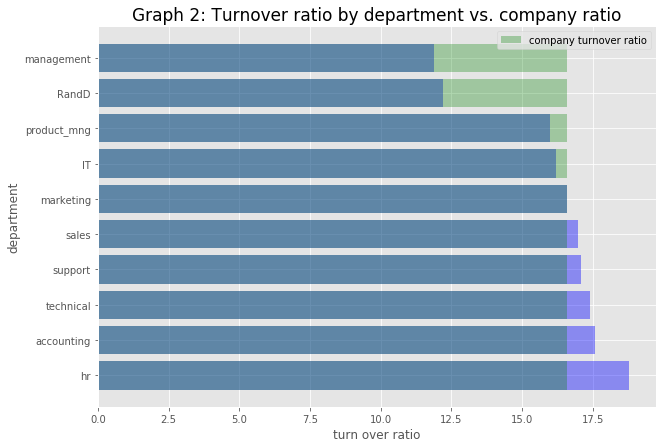

In [94]:
#this graph shows turnover ratio per department vs. Company ratio (16.6%)

plt.figure(figsize=(10,7))
plt.barh(headcount_sorted['department'],headcount_sorted['turn_over_ratio'],color='blue',alpha=0.4)
plt.barh(headcount_sorted['department'],turnover_ratio,alpha=.3,color='green', label='company turnover ratio')
plt.xlabel('turn over ratio')
plt.ylabel('department')
plt.legend()
plt.title('Graph 2: Turnover ratio by department vs. company ratio', fontsize= 17)
plt.show()

### Could we know which variable has the most influence to stay or leave a job?

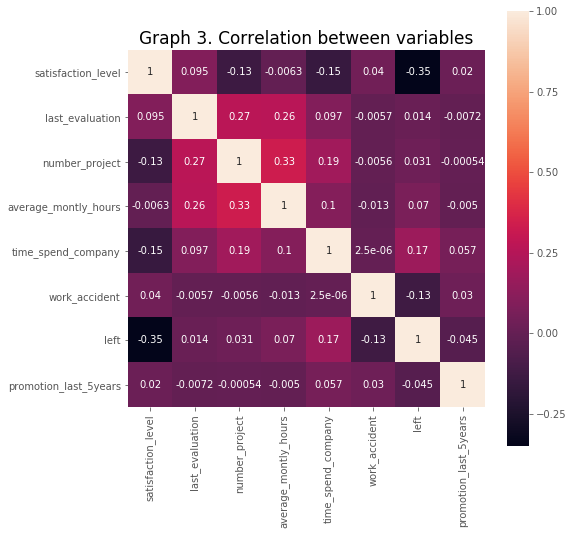

In [95]:
# Correlation heatmap
plt.figure(figsize=(8, 8)) 
sns.heatmap(hr_no_dupl.corr(), vmax=1, square=True,annot=True) 
plt.title("Graph 3. Correlation between variables", fontsize = 17)
plt.show()

#### Graph 3:  

* As expected, the **"satisfaction level" has the largest correlation with the decision to stay or leave** the company and it is negative (-0.35) 


* "Work_accident" has also a negative correlation (-0.13) whereas with the "time_spend_company" it is positive (0.17)


* The rest of variables have unsignificant correlation or even no one  with the fact of staying or leaving the company

Graph 1 also shows _the Pearson's correlation coefficient among features_: 

* There is a **negative correlation** coefficient (-0.15) between **"time_spend_company"** and **"satisfaction_level"** . It seems to indicate that __the more years working in the company, the lower level of satisfaction__


* However,  it also shows a __strong and positive correlation__ among __'last_evaluation'__  and __'number_project'__ and __"average_montly_hours"__. It could  indicate that the __company recognizes and values their employees' capacity and dedication at work__

### Let's start by taking a look at the distribution of employees satisfaction level at company

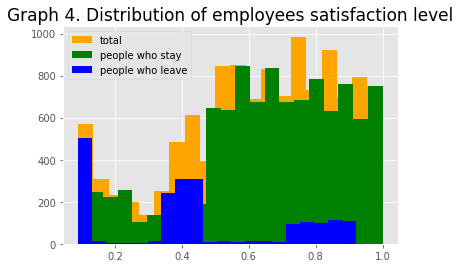

Mean satisfaction of total employees is 63 percent
Mean satisfaction of employees who leave is 44 percent
Mean satisfaction of employees who stay is 67 percent


In [97]:
#Graph:
plt.hist(hr_no_dupl.satisfaction_level,bins=20,color='orange',label='total') 
plt.hist(people_who_stay.satisfaction_level,bins=20,color='green',label='people who stay',) #people who stay
plt.hist(people_who_leave.satisfaction_level,bins=20,color='blue',label='people who leave') #people who leave
plt.title("Graph 4. Distribution of employees satisfaction level", fontsize = 17)
plt.legend()
plt.show()

print('Mean satisfaction of total employees is %.f percent'%(hr_no_dupl.satisfaction_level.mean()*100)) 
print('Mean satisfaction of employees who leave is %.f percent' %(people_who_leave.satisfaction_level.mean()*100))
print('Mean satisfaction of employees who stay is %.f percent' %(people_who_stay.satisfaction_level.mean()*100))

### Satisfaction level vs. number of projects

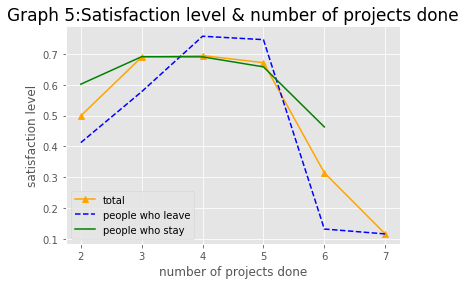

In [146]:
plt.plot(hr_no_dupl.groupby('number_project')['satisfaction_level'].mean(),'orange',label='total',marker='^')
plt.plot(people_who_leave.groupby('number_project')['satisfaction_level'].mean(),'b--',label='people who leave')
plt.plot(people_who_stay.groupby('number_project')['satisfaction_level'].mean(),'green',label='people who stay')
plt.ylabel('satisfaction level')
plt.xlabel('number of projects done')
plt.legend()
plt.title('Graph 5:Satisfaction level & number of projects done', fontsize = 17)
plt.show()

### Satisfaction level vs. time spend at company

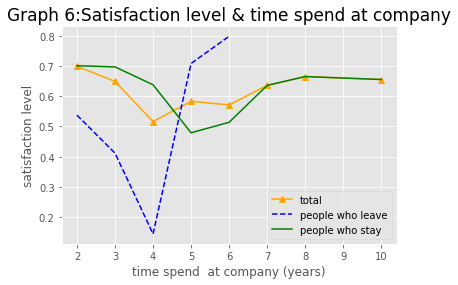

In [148]:
plt.plot(hr_no_dupl.groupby('time_spend_company')['satisfaction_level'].mean(),'orange',label='total',marker='^')
plt.plot(people_who_leave.groupby('time_spend_company')['satisfaction_level'].mean(),'b--',label='people who leave')
plt.plot(people_who_stay.groupby('time_spend_company')['satisfaction_level'].mean(),'green',label='people who stay')
plt.ylabel('satisfaction level')
plt.xlabel('time spend  at company (years)')
plt.legend()
plt.title('Graph 6:Satisfaction level & time spend at company', fontsize = 17)
plt.show()

### Satisfaction level vs. salary

In [151]:
people_who_leave.groupby('salary').satisfaction_level.agg(['mean', 'count'])

,mean,count
salary,,
high,0.437500,48
low,0.440630,1174
medium,0.439896,769


In [152]:
people_who_stay.groupby('salary').satisfaction_level.agg(['mean', 'count'])

,mean,count
salary,,
high,0.653832,942
low,0.669457,4566
medium,0.668077,4492


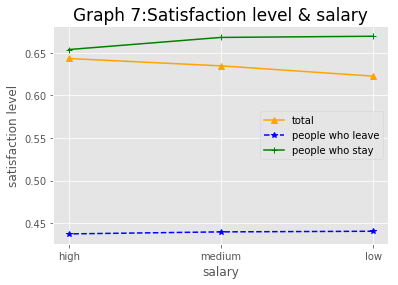

In [153]:
plt.plot(hr_no_dupl.groupby('salary')['satisfaction_level'].mean().sort_values(ascending=False),'orange',label='total',marker='^')
plt.plot(people_who_leave.groupby('salary')['satisfaction_level'].mean().sort_values(ascending=False),'b--',label='people who leave',marker='*')
plt.plot(people_who_stay.groupby('salary')['satisfaction_level'].mean().sort_values(ascending=False),'green',label='people who stay',marker='+')
plt.ylabel('satisfaction level')
plt.xlabel('salary')
plt.legend()
plt.title('Graph 7:Satisfaction level & salary', fontsize = 17)
plt.show()

### Accidents

In [98]:
#Total Accidents in company
hr_no_dupl['work_accident'].sum()

1850

In [119]:
#How many accidents belong to each group of employees?
hr_no_dupl.groupby('left')['work_accident'].sum()

left
0    1745
1     105
Name: work_accident, dtype: int64

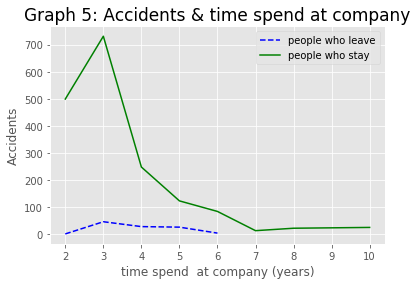

In [124]:
#How is the distribution over time? 
plt.plot(people_who_leave.groupby('time_spend_company')['work_accident'].sum(),'b--',label='people who leave')
plt.plot(people_who_stay.groupby('time_spend_company')['work_accident'].sum(),'green',label='people who stay')
plt.ylabel('Accidents')
plt.xlabel('time spend  at company (years)')
plt.legend()
plt.title('Graph 5: Accidents & time spend at company', fontsize = 17)
plt.show()

In [145]:
#What is the number of accidents split between people who stay and leave in the same period of time?
hr_no_dupl[hr_no_dupl['time_spend_company']<7].groupby('left')['work_accident'].sum()

left
0    1685
1     105
Name: work_accident, dtype: int64

In [144]:
#Which are the departments with more accidents?
hr_no_dupl.groupby('department')['work_accident'].sum().reset_index().sort_values(by='work_accident',ascending=False)

,department,work_accident
7,sales,498
9,technical,339
8,support,299
0,IT,139
1,RandD,119
6,product_mng,109
5,marketing,108
2,accounting,87
3,hr,80
4,management,72


In [101]:
#Focus on people who leave, which department has the greatest number of accidents? 

accidents= round(people_who_leave.groupby('department')['work_accident'].sum()/people_who_leave['work_accident'].sum()*100,2)
accidents.reset_index().sort_values(by='work_accident',ascending=False)

,department,work_accident
7,sales,29.52
9,technical,18.10
8,support,17.14
0,IT,6.67
1,RandD,6.67
2,accounting,4.76
3,hr,4.76
6,product_mng,4.76
4,management,3.81
5,marketing,3.81


In [102]:
hr_no_dupl.groupby('work_accident').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,promotion_last_5years
work_accident,,,,,,,
0,0.625546,0.717092,3.805640,200.741150,3.364856,0.185978,0.015284
1,0.652200,0.714438,3.787568,199.006486,3.364865,0.056757,0.025946


### Salary

In [83]:
#Salary breakdown

round(hr_no_dupl.groupby('salary')['left'].count()/hr_no_dupl['salary'].count()*100,2)

salary
high       8.26
low       47.87
medium    43.87
Name: left, dtype: float64

In [84]:
#How is the breakdown for employee who leaves?
round(people_who_leave.groupby('salary')['left'].count()/people_who_leave['salary'].count()*100,2)

salary
high       2.41
low       58.97
medium    38.62
Name: left, dtype: float64

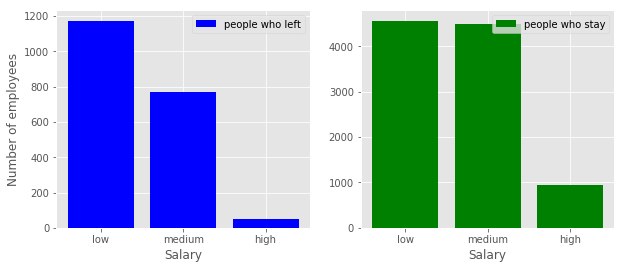

In [85]:
#Graphic

X=hr_no_dupl['salary'].unique()
Y1=people_who_leave.groupby(['salary'])['left'].count().reset_index().sort_values('left', ascending=False ).left.values
Y2=people_who_stay.groupby(['salary'])['left'].count().reset_index().sort_values('left', ascending=False ).left.values

figure, axs = plt.subplots(ncols=2)

axs[0].bar(X, Y1,color='blue')
axs[1].bar(X, Y2,color='green')
axs[0].set_ylabel('Number of employees')
axs[0].set_xlabel('Salary')
axs[1].set_xlabel('Salary')

figure.set_size_inches(10,4)

axs[0].legend(['people who left'])
axs[1].legend(['people who stay'])
plt.show()

### Some conclusions and next steps

* Sales, Technical and Support are the departments with a higher number of employees (50% over total. _See graph 1_)

* The departments aforementioned, HR and Accounting have a turnover ratio above the average. Instead Management is far below the average, probably (don't know yet) because their salaries were higher (_See graph 2_)

* _Graph 3_ shows that:
    - the higher number of accidents take place during the third year working at company
    - people who left has less accidents than people who stay
    
* As expected, a higher number of employees left in the low salary group compared to the high salary group (_Section 4.3_)

* Satisfaction level is quite higher in employees stayed the company than employees who left (_see graphs 5 and 6_)

* Employees in high salary group have lower satisfaction level compared to the low and medium group whether they leave or stay. Employees who left have lower satisfaction level in each salary tranche. (_see graph 7_)


# 5. Saving cleaned dataset

In [27]:
hr_no_dupl.to_csv('data/HR_data_cleaned.csv',index=False)